In [218]:
import numpy as np 
import datetime as dt
import pandas as pd 
from pandas.api.types import *

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

import os
print(os.listdir("/Users/tejaswinalwad/Machine_Learning/Kaggle_Projects/Restaurant Revenue Prediction"))

['Res_Rev_submission.csv', 'sampleSubmission.csv', 'Restaurant_Revenue_with_featexp .ipynb', 'test.csv', 'RR_with_Corsera_approach.ipynb', 'train.csv', '.ipynb_checkpoints', 'Restaurant_Revenue_Prediction.ipynb', 'test.csv.zip', 'train.csv.zip', 'Res_Rev_submission_gbc.csv']


In [219]:
train_raw = pd.read_csv("/Users/tejaswinalwad/Machine_Learning/Kaggle_Projects/Restaurant Revenue Prediction/train.csv")
test_raw = pd.read_csv("/Users/tejaswinalwad/Machine_Learning/Kaggle_Projects/Restaurant Revenue Prediction/test.csv")
# train_data = train.drop('Id', axis=1)

**Helper Functions**

In [220]:
import math
def rmse(x, y): return math.sqrt(((x-y)**2).mean())

In [221]:
def print_score(m):
    res  = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
           m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [222]:
import re
def add_datepart(df, fldname):
    fld = df[fldname]
    print(fld.dt)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    for n in ('Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear', 
             'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start',):
        df[targ_pre+n] = getattr(fld.dt,n.lower())
    df[targ_pre+'Elapsed'] = (fld - fld.min()).dt.days
    df.drop(fldname, axis=1, inplace=True)

**change dtype of 'Open Date' from object to datetime64**

In [223]:
from datetime import datetime
import datetime as dt
train_raw['Open Date'] = train_raw['Open Date'].apply(lambda x: dt.datetime.strptime(x,'%m/%d/%Y'))
test_raw['Open Date'] = test_raw['Open Date'].apply(lambda x: dt.datetime.strptime(x,'%m/%d/%Y'))

In [224]:
train_data = train_raw
test_data = test_raw

In [225]:
train_data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [226]:
test_data.tail()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
99995,99995,2000-01-05,Antalya,Other,FC,5,5.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
99996,99996,2011-07-18,Niğde,Other,IL,1,2.0,4.0,3.0,1,...,1.0,3.0,5,0,0,0,4,0,0,0
99997,99997,2012-12-29,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,...,4.0,1.0,5,5,3,2,4,4,4,2
99998,99998,2013-10-12,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,4,...,7.5,5.0,0,0,0,4,0,0,0,0
99999,99999,2010-10-05,İstanbul,Big Cities,IL,2,5.0,4.0,4.0,2,...,5.0,3.0,0,2,0,2,2,4,2,0


In [227]:
train_data['City Group'].value_counts()

Big Cities    78
Other         59
Name: City Group, dtype: int64

In [228]:
train_data['Type'].value_counts()

FC    76
IL    60
DT     1
Name: Type, dtype: int64

In [229]:
Type = ['FC', 'IL', 'DT', 'MB']

In [239]:
train_data = train_raw
test_data = test_raw

In [241]:
train_data = train_data.drop('City', axis=1)
test_data = test_data.drop('City', axis=1)

KeyError: "['City'] not found in axis"

In [242]:
train_data.head()

,Id,Open Date,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,1999-07-17,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,2008-02-14,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,2013-03-09,Other,IL,2,4.0,2.0,5.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,2012-02-02,Other,IL,6,4.5,6.0,6.0,4,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,2009-05-09,Other,IL,3,4.0,3.0,4.0,2,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [243]:
add_datepart(train_data, 'Open Date')
add_datepart(test_data, 'Open Date')

In [244]:
train_data_City_Group = train_raw['City Group']
train_data_Type = train_data['Type']
test_data_City_Group = test_raw['City Group']
test_data_Type = test_raw['Type']

In [245]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_data['City Group'] = le.fit_transform(train_data_City_Group)
train_data['Type'] = le.fit_transform(train_data_Type)
test_data['City Group'] = le.fit_transform(test_data_City_Group)
test_data['Type'] = le.fit_transform(test_data_Type)

In [246]:
train_data.head()

,Id,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,Open Month,Open Week,Open Day,Open Dayofweek,Open Dayofyear,Open Is_month_end,Open Is_month_start,Open Is_quarter_end,Open Is_quarter_start,Open Elapsed
0,0,0,2,4,5.0,4.0,4.0,2,2,5,...,7,28,17,5,198,False,False,False,False,1165
1,1,0,1,4,5.0,4.0,4.0,1,2,5,...,2,7,14,3,45,False,False,False,False,4299
2,2,1,2,2,4.0,2.0,5.0,2,3,5,...,3,10,9,5,68,False,False,False,False,6149
3,3,1,2,6,4.5,6.0,6.0,4,4,10,...,2,5,2,3,33,False,False,False,False,5748
4,4,1,2,3,4.0,3.0,4.0,2,2,5,...,5,19,9,5,129,False,False,False,False,4749


In [247]:
test_data.head()

,Id,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,Open Month,Open Week,Open Day,Open Dayofweek,Open Dayofyear,Open Is_month_end,Open Is_month_start,Open Is_quarter_end,Open Is_quarter_start,Open Elapsed
0,0,1,1,1,4.0,4.0,4.0,1,2,5,...,1,3,22,5,22,False,False,False,False,5738
1,1,1,2,3,4.0,4.0,4.0,2,2,5,...,3,11,18,4,77,False,False,False,False,5793
2,2,0,1,3,4.0,4.0,4.0,2,2,5,...,10,44,30,2,303,False,False,False,False,6750
3,3,1,2,2,4.0,4.0,4.0,2,3,5,...,5,19,6,0,126,False,False,False,False,6573
4,4,1,1,2,4.0,4.0,4.0,1,2,5,...,7,31,31,2,212,True,False,False,False,6659


In [248]:
X = train_data.drop('revenue', axis=1)
y = train_data['revenue']

In [249]:
X.shape, y.shape, train_data.shape

((137, 50), (137,), (137, 51))

**Splitting data into training and validation test sets**

In [255]:
from sklearn.model_selection import train_test_split

In [256]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)

**The very first algorithm on data/ raw model**

In [257]:
from sklearn.linear_model import LinearRegression
ln = LinearRegression()
ln.fit(X_train,y_train)
print_score(ln)

[1427697.2301778405, 7518942.2593650855, 0.63765778695958, -5.688459134579955]


In [258]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, 
                        max_features=0.5, n_jobs=-1, oob_score=True )
rf.fit(X_train,y_train)
print_score(rf)

[1469484.6743260887, 2878657.7656096136, 0.616136498345879, 0.01962404604678869, -0.05050578040142106]


**Using RF Feature importance**

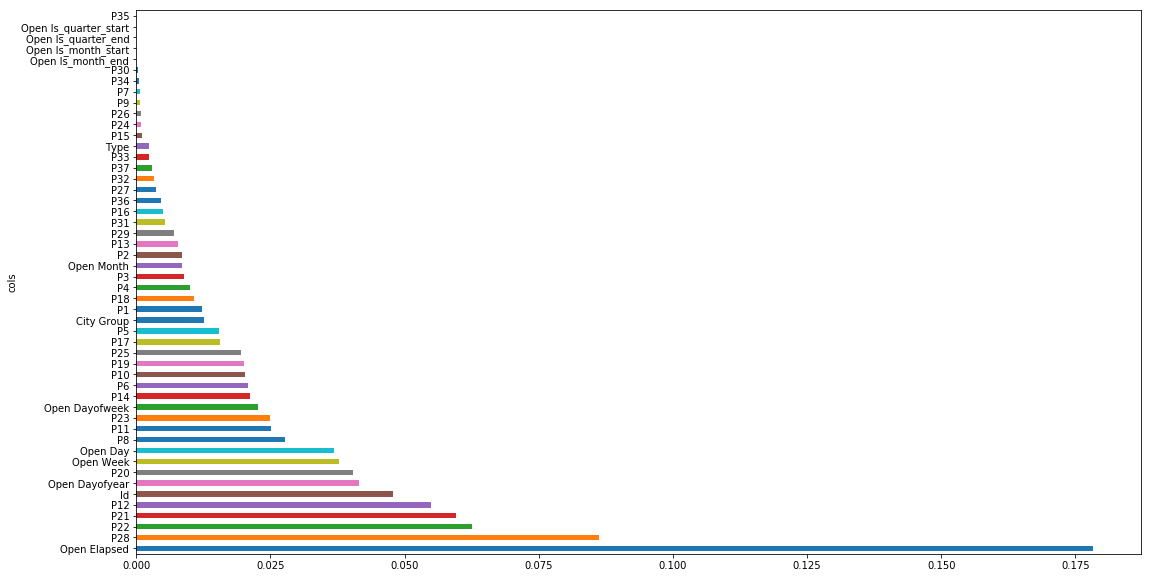

In [278]:
FE = pd.DataFrame({'cols':X.columns, 'imp':rf.feature_importances_}
                       ).sort_values('imp', ascending=False)
FE.plot('cols', 'imp', 'barh', figsize=(18,10), legend=False);

**Check for Bias and Variance**

Text(0,0.5,'Predeicted Revenue')

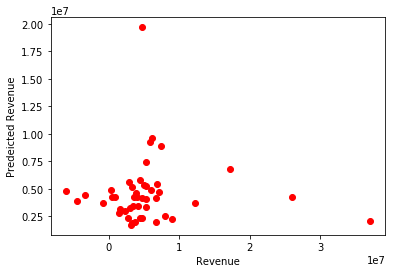

In [276]:
# plt.plot(rmse(rf.predict(X_train), y_train), rmse(rf.predict(X_valid), y_valid), 'ro')
plt.plot(ln.predict(X_valid), y_valid, 'ro')
plt.xlabel('Revenue')
plt.ylabel('Predeicted Revenue')

Text(0,0.5,'Predeicted Revenue')

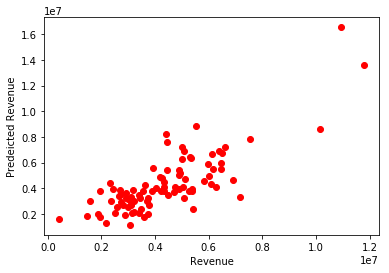

In [277]:
# plt.plot(rmse(rf.predict(X_train), y_train), rmse(rf.predict(X_valid), y_valid), 'ro')
plt.plot(ln.predict(X_train), y_train, 'ro')
plt.xlabel('Revenue')
plt.ylabel('Predeicted Revenue')

In [298]:
new_features = FE[FE.imp>0.01].cols

train_to_keep = train_data[new_features]
test_to_keep = test_data[new_features]

In [299]:
train_to_keep.head()

,Open Elapsed,P28,P22,P21,P12,Id,Open Dayofyear,P20,Open Week,Open Day,...,P6,P10,P19,P25,P17,P5,City Group,P1,P18,P4
0,1165,2.0,3,1,5,0,198,4,28,17,...,2,5,5,1,2,2,0,4,4,4.0
1,4299,3.0,3,1,5,1,45,2,7,14,...,2,5,3,0,0,1,0,4,0,4.0
2,6149,1.0,1,1,5,2,68,1,10,9,...,3,5,1,0,0,2,1,2,0,5.0
3,5748,2.5,1,6,10,3,33,12,5,2,...,4,10,20,2,3,4,1,6,12,6.0
4,4749,1.0,2,1,5,4,129,2,19,9,...,2,5,2,3,1,2,1,3,4,4.0


In [300]:
test_to_keep.head()

,Open Elapsed,P28,P22,P21,P12,Id,Open Dayofyear,P20,Open Week,Open Day,...,P6,P10,P19,P25,P17,P5,City Group,P1,P18,P4
0,5738,2.0,1,3,3,0,22,5,3,22,...,2,5,5,0,2,1,1,1,0,4.0
1,5793,1.0,2,3,4,1,77,5,11,18,...,2,4,5,0,0,2,1,3,0,4.0
2,6750,2.0,5,5,5,2,303,5,44,30,...,2,5,5,0,0,2,0,3,0,4.0
3,6573,2.0,2,3,4,3,126,4,19,6,...,3,4,4,0,0,2,1,2,4,4.0
4,6659,5.0,1,3,5,4,212,5,31,31,...,2,4,1,0,0,1,1,2,0,4.0


In [302]:
train_to_keep.shape , test_to_keep.shape

((137, 25), (100000, 25))

In [320]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(ln, X_train, y_train, train_sizes=[30, 50, 60])

(0, 40)

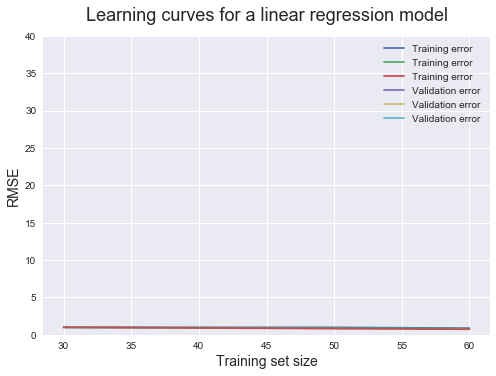

In [321]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores, label = 'Training error')
plt.plot(train_sizes, valid_scores, label = 'Validation error')
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,40)